<a href="https://colab.research.google.com/github/srijan210704/Stock-Market-Predictor/blob/main/Stock_market_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('HINDUNILVR.csv')

In [5]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HINDLEVER,EQ,2136.60,2300.0,2307.55,2300.00,2307.55,2307.55,2307.08,24903,5.745330e+12,NaN,NaN,NaN
1,2000-01-04,HINDLEVER,EQ,2307.55,2381.0,2381.00,2250.00,2270.00,2281.05,2298.15,58514,1.344740e+13,NaN,NaN,NaN
2,2000-01-05,HINDLEVER,EQ,2281.05,2200.0,2250.00,2105.00,2183.50,2199.90,2211.17,80296,1.775482e+13,NaN,NaN,NaN
3,2000-01-06,HINDLEVER,EQ,2199.90,2224.9,2360.00,2210.00,2300.00,2288.20,2301.80,190032,4.374157e+13,NaN,NaN,NaN
4,2000-01-07,HINDLEVER,EQ,2288.20,2300.0,2452.00,2282.25,2395.00,2412.95,2380.24,192582,4.583919e+13,NaN,NaN,NaN


In [7]:
df.shape

(5306, 15)

In [9]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4791 non-null   float64
 14  %Deliverble         4791 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [11]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     515
%Deliverble            515
dtype: int64

Text(0, 0.5, 'Count')

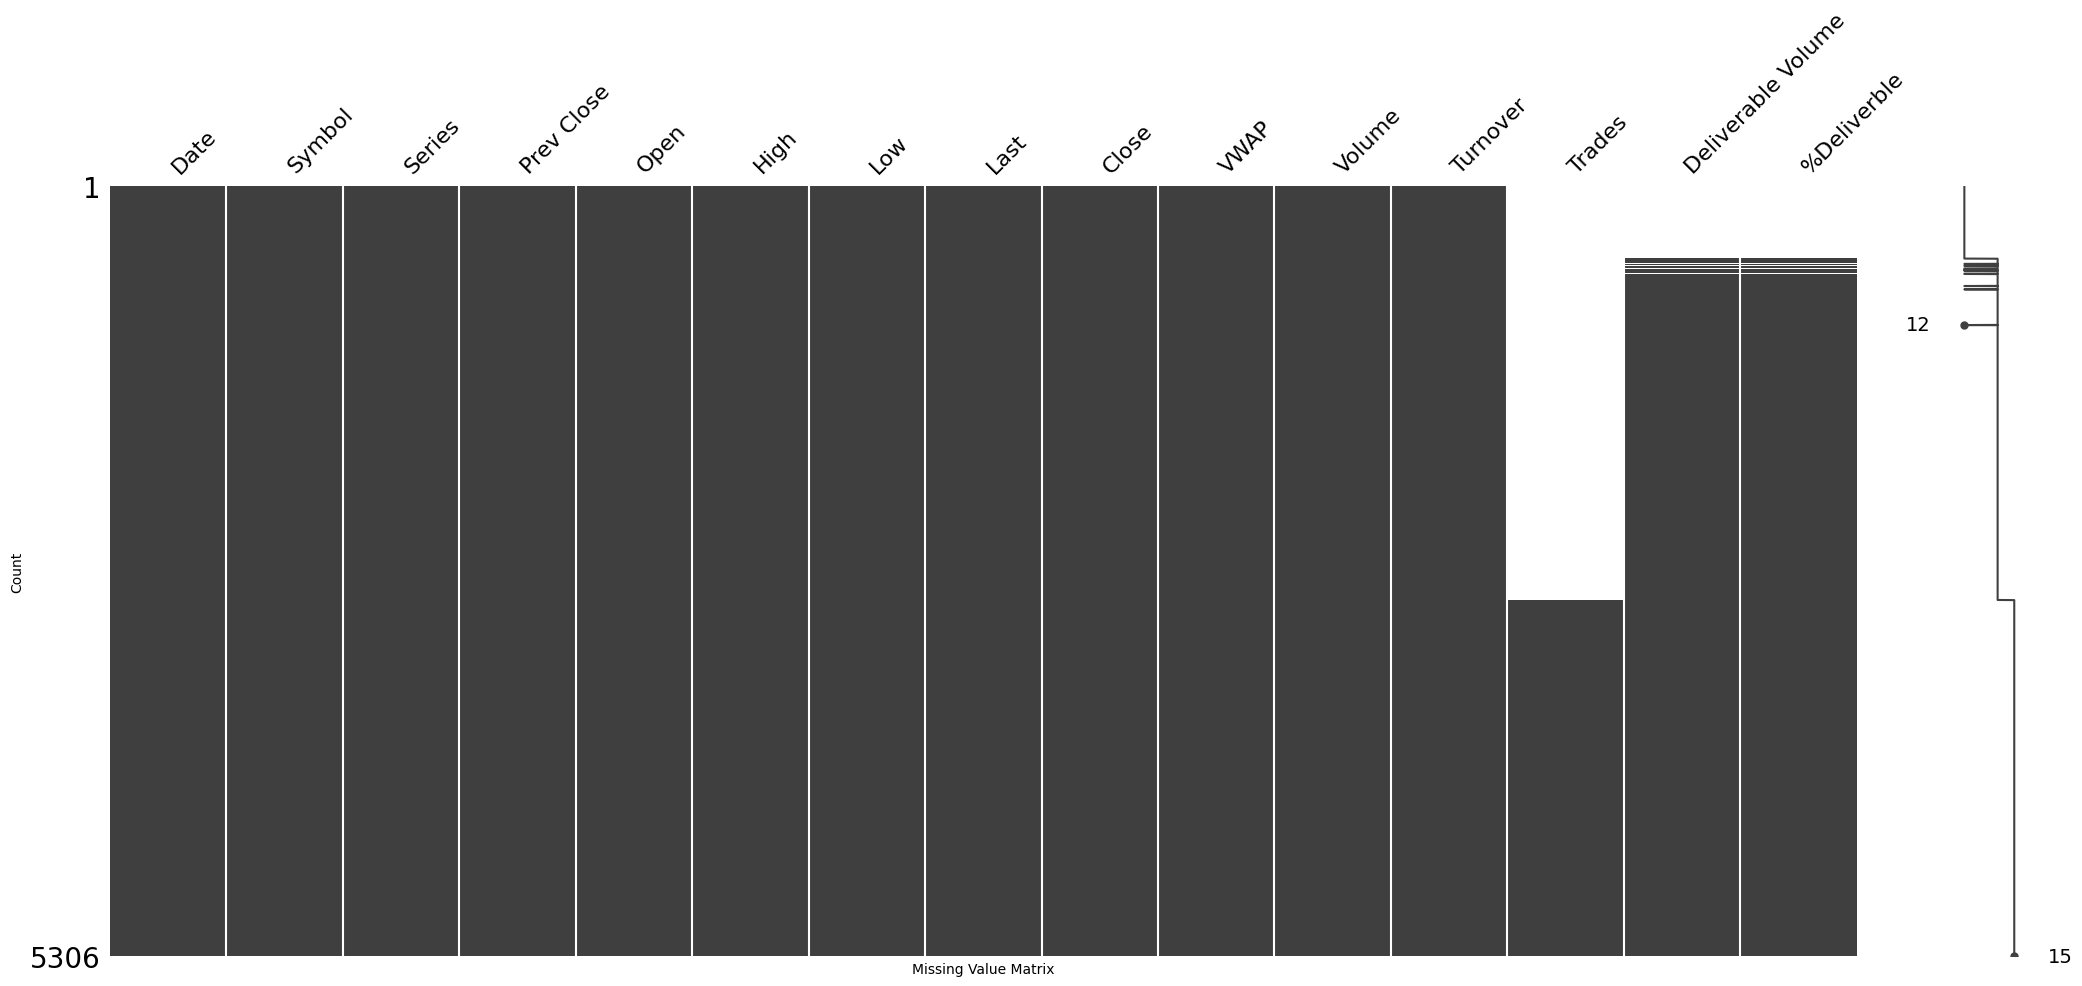

In [13]:
import missingno as msno
msno.matrix(df)
plt.xlabel("Missing Value Matrix")
plt.ylabel("Count")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4791 non-null   float64
 14  %Deliverble         4791 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [15]:
stock_price_oneyear = df[(df['Date']>'2011-03-31')&(df['Date']<'2012-04-01')]
stock_price_oneyear

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2810,2011-04-01,HINDUNILVR,EQ,287.10,286.00,290.05,282.00,283.70,283.95,285.51,1301124,3.714816e+13,NaN,834937.0,0.6417
2811,2011-04-04,HINDUNILVR,EQ,283.95,283.10,284.90,277.15,279.15,279.65,279.30,970446,2.710416e+13,NaN,498086.0,0.5133
2812,2011-04-05,HINDUNILVR,EQ,279.65,279.00,282.75,274.00,275.55,275.35,277.69,1201569,3.336678e+13,NaN,693534.0,0.5772
2813,2011-04-06,HINDUNILVR,EQ,275.35,276.00,278.20,274.10,277.00,277.20,276.22,1355991,3.745525e+13,NaN,821116.0,0.6055
2814,2011-04-07,HINDUNILVR,EQ,277.20,277.60,279.25,275.00,276.70,276.00,276.93,1185709,3.283621e+13,NaN,756480.0,0.6380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,2012-03-26,HINDUNILVR,EQ,403.10,403.00,405.45,396.55,402.05,403.35,402.43,1925706,7.749614e+13,26174.0,1251626.0,0.6500
3055,2012-03-27,HINDUNILVR,EQ,403.35,404.80,417.70,403.00,416.50,416.05,414.18,4279621,1.772512e+14,45298.0,2878874.0,0.6727
3056,2012-03-28,HINDUNILVR,EQ,416.05,415.55,418.55,411.00,412.85,412.50,415.12,1830505,7.598867e+13,34924.0,1228243.0,0.6710
3057,2012-03-29,HINDUNILVR,EQ,412.50,411.00,414.55,406.20,409.80,408.35,409.40,2403473,9.839861e+13,57498.0,1472232.0,0.6125


In [16]:
stock_price_oneyear.isnull().sum()

Date                   0
Symbol                 0
Series                 0
Prev Close             0
Open                   0
High                   0
Low                    0
Last                   0
Close                  0
VWAP                   0
Volume                 0
Turnover               0
Trades                40
Deliverable Volume     0
%Deliverble            0
dtype: int64

In [19]:
stock_price_oneyear.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,2.490000e+02,2.490000e+02,209.000000,2.490000e+02,249.000000
mean,348.082932,348.267871,352.698795,344.391767,348.717871,348.576707,348.634498,2.473939e+06,8.717349e+13,31808.765550,1.574453e+06,0.631573
std,40.809036,41.023908,41.146263,40.500460,40.820001,40.812014,40.863663,1.496865e+06,5.573227e+13,16015.735546,9.481096e+05,0.100096
min,267.550000,269.900000,275.250000,265.900000,267.900000,267.550000,269.200000,4.771100e+04,1.823632e+12,789.000000,1.697700e+04,0.247000
25%,318.850000,318.000000,321.150000,314.500000,319.400000,319.200000,318.310000,1.500384e+06,5.025147e+13,19817.000000,9.002700e+05,0.573500
50%,334.750000,334.000000,339.900000,331.650000,335.400000,335.750000,335.620000,2.103172e+06,7.449584e+13,28905.000000,1.371964e+06,0.639100
75%,388.500000,388.850000,393.000000,384.100000,389.150000,388.550000,389.180000,2.979527e+06,1.076948e+14,40153.000000,1.980878e+06,0.700700
max,419.200000,419.000000,420.250000,415.050000,419.000000,419.200000,417.740000,9.174039e+06,3.517152e+14,101499.000000,5.489205e+06,0.835000


<Axes: >

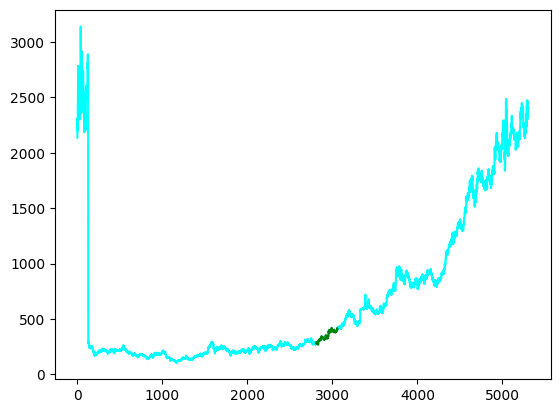

In [20]:
#Data Visualization
pl = df['Prev Close'].plot(c='cyan')
stock_price_oneyear['Prev Close'].plot(ax=pl,c='green')

<Axes: >

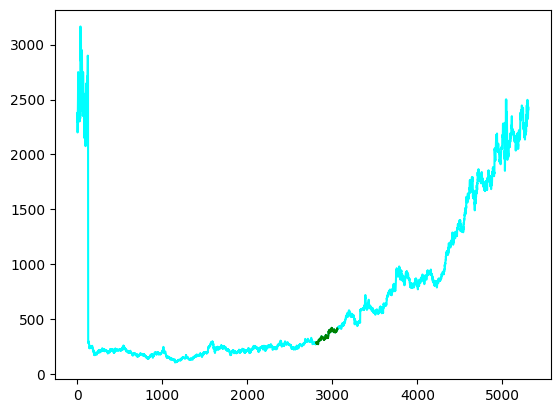

In [21]:
pl = df['Open'].plot(c='cyan')
stock_price_oneyear['Open'].plot(ax=pl,c='green')

<Axes: >

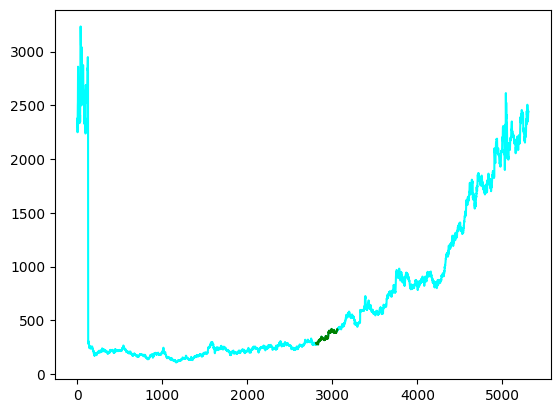

In [22]:
pl = df['High'].plot(c='cyan')
stock_price_oneyear['High'].plot(ax=pl,c='green')

<Axes: >

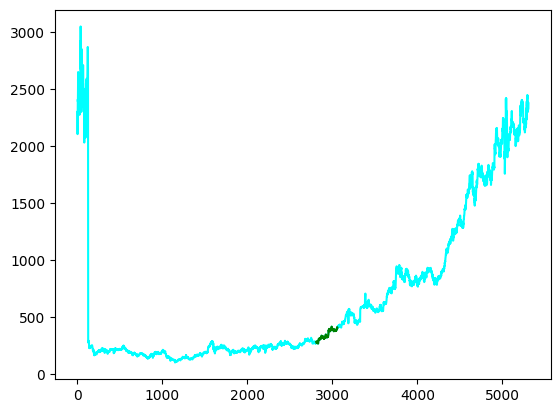

In [27]:
pl = df['Low'].plot(c='cyan')
stock_price_oneyear['Low'].plot(ax=pl,c='green')

<Axes: >

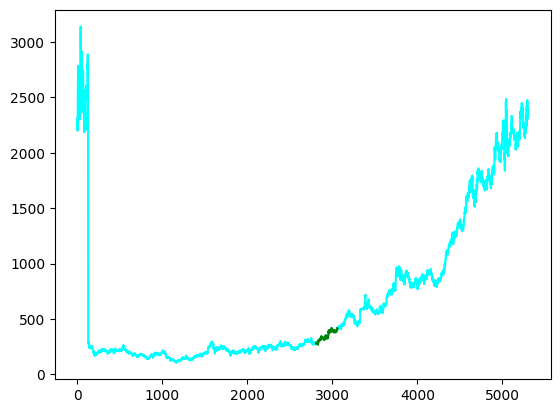

In [25]:
pl = df['Close'].plot(c='cyan')
stock_price_oneyear['Close'].plot(ax=pl,c='green')

<Axes: >

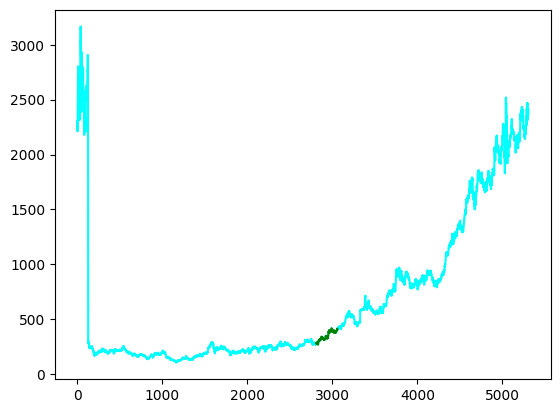

In [26]:
pl = df['VWAP'].plot(c='cyan')
stock_price_oneyear['VWAP'].plot(ax=pl,c='green')